In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('notebook_data/misc/RG_mismatch_dataframe.csv')

In [30]:
df

,experiment_id,well,timepoint,strain,strain_class,inducer_concentration,total_counts,flow_volume,cells/mL,predicted_output_mean,predicted_output_std,dead,od
0,r1dvbs7kdxq4md,a1,24.0,UWBF_6390,Control,0.00000,30000,26000,1.153846e+06,0.995967,0.063381,0.0,0.063035
1,r1dvbs7kdxq4md,a10,24.0,UWBF_24926,Experiment,0.00020,3020,60000,5.033333e+04,0.989735,0.100811,1.0,0.034404
2,r1dvbs7kdxq4md,a11,24.0,UWBF_24926,Experiment,0.00040,2531,60000,4.218333e+04,0.991703,0.090728,1.0,0.034866
3,r1dvbs7kdxq4md,a12,24.0,UWBF_24926,Experiment,0.00000,15161,60000,2.526833e+05,0.998549,0.038067,1.0,0.040383
4,r1dvbs7kdxq4md,a4,24.0,UWBF_24926,Experiment,0.00001,30000,37000,8.108108e+05,0.998200,0.042389,0.0,0.050585
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,r1dvbs8vu72tbp,h8,24.0,UWBF_24961,Experiment,0.00008,30000,42000,7.142857e+05,0.992667,0.085322,0.0,0.054790
87,r1dvbs8vu72tbp,h9,24.0,UWBF_24961,Experiment,0.00010,30000,53000,5.660377e+05,0.994367,0.074845,1.0,0.048302
88,r1dvbsa7n5qwxe,e9,24.0,UWBF_25784,Control,0.00010,30000,51000,5.882353e+05,0.996033,0.062857,0.0,0.056392
89,r1dvbsa7n5qwxe,g1,24.0,UWBF_23970,Control,0.00000,30000,34000,8.823529e+05,0.995367,0.067912,0.0,0.062849


In [31]:
original = pd.read_csv('notebook_data/misc/RF_YeastSTATES-CRISPR-Short-Duration-Time-Series-20191208_20200610192131.csv')

In [32]:
# Filter out controls
if 'standard_type' in original.columns:
    original = original[pd.isna(original['standard_type'])]

if 'control_type' in original.columns:
    original = original[original['control_type'] != 'EMPTY_VECTOR']

if 'well' in original.columns:
    original = original[original['well'] != 'e2']
    original = original[original['well'] != 'f2']

In [33]:
original.columns

Index(['Unnamed: 0', 'experiment_id', 'well', '_id', 'sample_id',
       'experiment_reference', 'lab', 'replicate', 'replicate_group',
       'replicate_group_string', 'strain', 'strain_name', 'strain_class',
       'media_type', 'inducer_type', 'inducer_concentration',
       'inducer_concentration_unit', 'temperature', 'temperature_unit',
       'timepoint', 'timepoint_unit', 'aliquot_id', 'total_counts',
       'TX_plate_name', 'TX_project_name', 'TX_sample_name', 'flow_volume',
       'flow_rate_uL/min', 'date_of_experiment', 'cells/mL',
       'predicted_output_mean', 'predicted_output_std'],
      dtype='object')

In [34]:
original_grouped = original.groupby(['experiment_id','well']).agg({'predicted_output_mean': [np.mean, np.std], 'cells/mL': [np.mean, np.std]}) 
original_grouped.shape

(276, 4)

In [35]:
original_grouped = original_grouped.reset_index()
original_grouped

experiment_id well predicted_output_mean  \
                                                                  mean   
0    experiment.transcriptic.r1dvbs7kdxq4md   a1              0.904039   
1    experiment.transcriptic.r1dvbs7kdxq4md  a10              0.876498   
2    experiment.transcriptic.r1dvbs7kdxq4md  a11              0.901277   
3    experiment.transcriptic.r1dvbs7kdxq4md  a12              0.875190   
4    experiment.transcriptic.r1dvbs7kdxq4md   a2              0.575408   
..                                      ...  ...                   ...   
271  experiment.transcriptic.r1dvbsa7n5qwxe   h5              0.980608   
272  experiment.transcriptic.r1dvbsa7n5qwxe   h6              0.974850   
273  experiment.transcriptic.r1dvbsa7n5qwxe   h7              0.981141   
274  experiment.transcriptic.r1dvbsa7n5qwxe   h8              0.972550   
275  experiment.transcriptic.r1dvbsa7n5qwxe   h9              0.985691   

                   cells/mL                
          std          mean           std  
0    0.164447  3.305782e+05  5.493669e+05  
1    0.146506  1.544167e+04  2.329207e+04  
2    0.104371  1.282917e+04  1.959510e+04  
3    0.142082  7.189167e+04  1.205737e+05  
4    0.262960  3.479167e+03  3.436470e+03  
..        ...           ...           ...  
271  0.005301  6.745667e+05  8.469923e+05  
272  0.014693  1.592532e+06  1.022287e+06  
273  0.010658  8.589032e+05  8.984865e+05  
274  0.017331  1.778222e+06  9.101058e+05  
275  0.012976  2.287048e+05  3.284452e+05  

[276 rows x 6 columns]

In [36]:
#original_grouped = original_grouped.sort_values(by='experiment_id', ascending=False)

In [37]:
cells_ml = pd.DataFrame()

cells_ml['experiment_id'] = original_grouped['experiment_id']
cells_ml['well'] = original_grouped['well']
cells_ml['cells_ml_mean'] = original_grouped['cells/mL']['mean']
cells_ml['cells_ml_std'] = original_grouped['cells/mL']['std']

In [38]:
q4md = cells_ml.iloc[0:92,]

In [39]:
tbp = cells_ml.iloc[92:184,]

In [40]:
wxe = cells_ml.iloc[184:,]

In [41]:
cells_ml = pd.concat([wxe, pd.concat([tbp, q4md], ignore_index=True)], ignore_index=True)

In [42]:
cells_ml

,experiment_id,well,cells_ml_mean,cells_ml_std
0,experiment.transcriptic.r1dvbsa7n5qwxe,a1,2.119593e+06,1.258697e+06
1,experiment.transcriptic.r1dvbsa7n5qwxe,a10,2.217532e+06,8.869521e+05
2,experiment.transcriptic.r1dvbsa7n5qwxe,a11,2.140152e+06,9.680680e+05
3,experiment.transcriptic.r1dvbsa7n5qwxe,a12,2.556818e+06,4.237687e+05
4,experiment.transcriptic.r1dvbsa7n5qwxe,a2,8.946167e+05,1.162146e+06
...,...,...,...,...
271,experiment.transcriptic.r1dvbs7kdxq4md,h5,6.318750e+04,1.074946e+05
272,experiment.transcriptic.r1dvbs7kdxq4md,h6,2.406833e+05,3.437525e+05
273,experiment.transcriptic.r1dvbs7kdxq4md,h7,1.074875e+05,1.863862e+05
274,experiment.transcriptic.r1dvbs7kdxq4md,h8,2.411542e+05,3.443389e+05


In [43]:
cells_ml.to_csv("notebook_data/misc/cellsML_YeastSTATES-CRISPR-Short-Duration-Time-Series-20191208_20200610192131.csv")

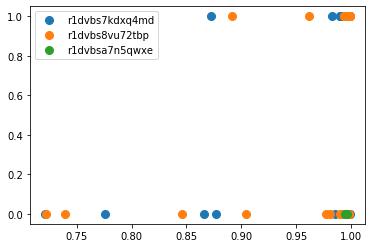

In [44]:
groups = df.groupby('experiment_id')

# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.predicted_output_mean, group.dead, marker='o', linestyle='', ms=8, label=name)
ax.legend()

#plt.xlim(0.975,1)
plt.show()

#plt.scatter(df['predicted_output_mean'], df['dead'])

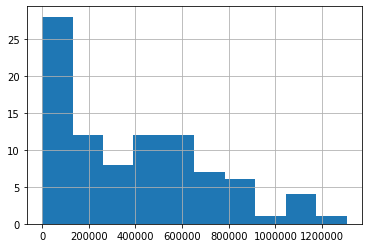

In [45]:
df['cells/mL'].hist()